In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [31]:
# Load your dataset
incident = pd.read_csv('incident_cleaned_final.csv')

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_52418/862203670.py:2: DtypeWarning: Columns (18,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  incident = pd.read_csv('incident_cleaned_final.csv')


In [38]:
# Convert 'incident_date_time' to datetime format
incident['incident_date_time'] = pd.to_datetime(incident['incident_date_time'])

# Extract year, month, day, and hour from 'incident_date_time'
incident['year'] = incident['incident_date_time'].dt.year
incident['month'] = incident['incident_date_time'].dt.month
incident['day'] = incident['incident_date_time'].dt.day
incident['hour'] = incident['incident_date_time'].dt.hour
incident['month_name'] = incident['incident_date_time'].dt.strftime('%B')

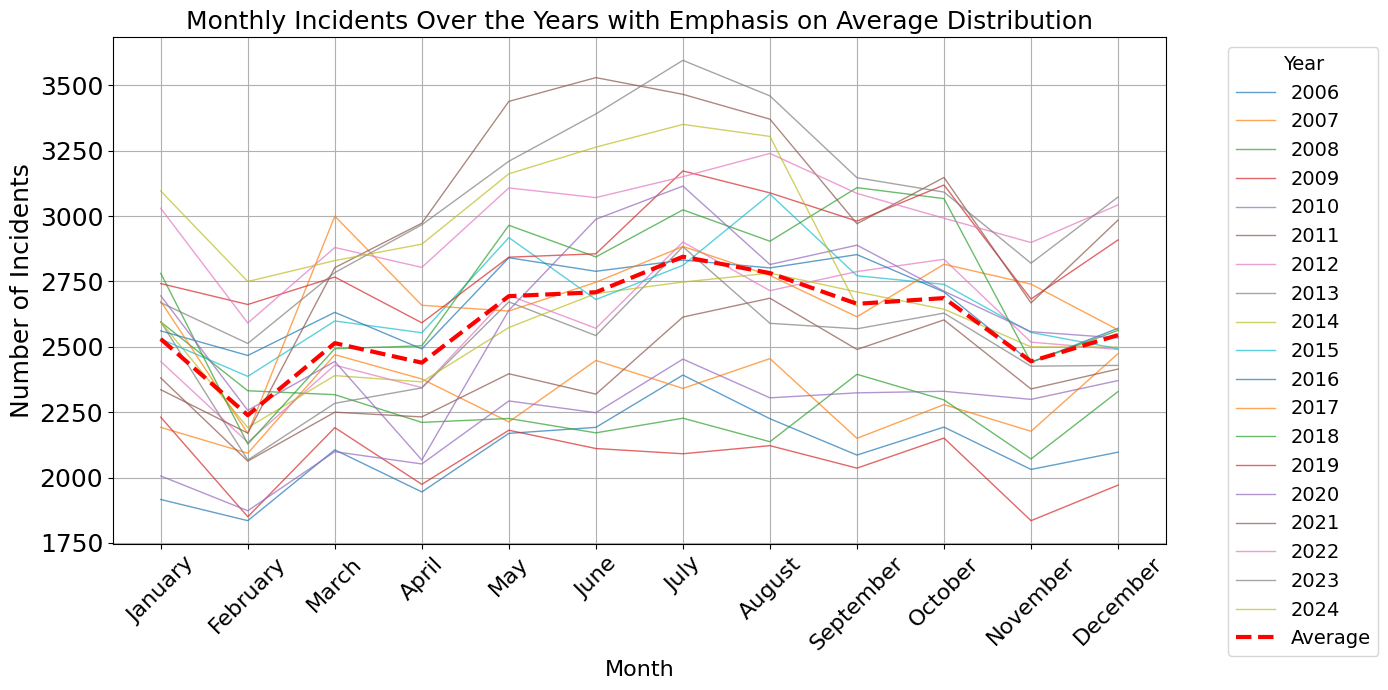

In [33]:

# Group by year and month, then count the incidents
incident_counts_month_year = incident.groupby(['year', 'month']).size().reset_index(name='incident_count')

# Pivot the data to get the months as rows and years as columns
monthly_incidents_pivot = incident_counts_month_year.pivot(index='month', columns='year', values='incident_count')

# Plotting the graph
plt.figure(figsize=(14, 7))

# Plot each year with thin lines
for year in monthly_incidents_pivot.columns:
    sns.lineplot(
        x=monthly_incidents_pivot.index, 
        y=monthly_incidents_pivot[year], 
        label=str(year), 
        linewidth=1, 
        alpha=0.7
    )

# Calculate the average monthly distribution across all years
monthly_average = monthly_incidents_pivot.mean(axis=1)

# Plot the average monthly distribution with a bold red line
sns.lineplot(
    x=monthly_average.index, 
    y=monthly_average.values, 
    color='red', 
    linewidth=3,
    linestyle='--',
    label='Average'
)

# Add title and labels
plt.title('Monthly Incidents Over the Years with Emphasis on Average Distribution', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Incidents', fontsize=18)

# Set x-ticks with month names instead of numbers
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45, fontsize=16)

# Set y-ticks font size
plt.yticks(fontsize=18)

# Add a grid for better readability
plt.grid(True)

# Move the legend outside the plot area
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14,title_fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


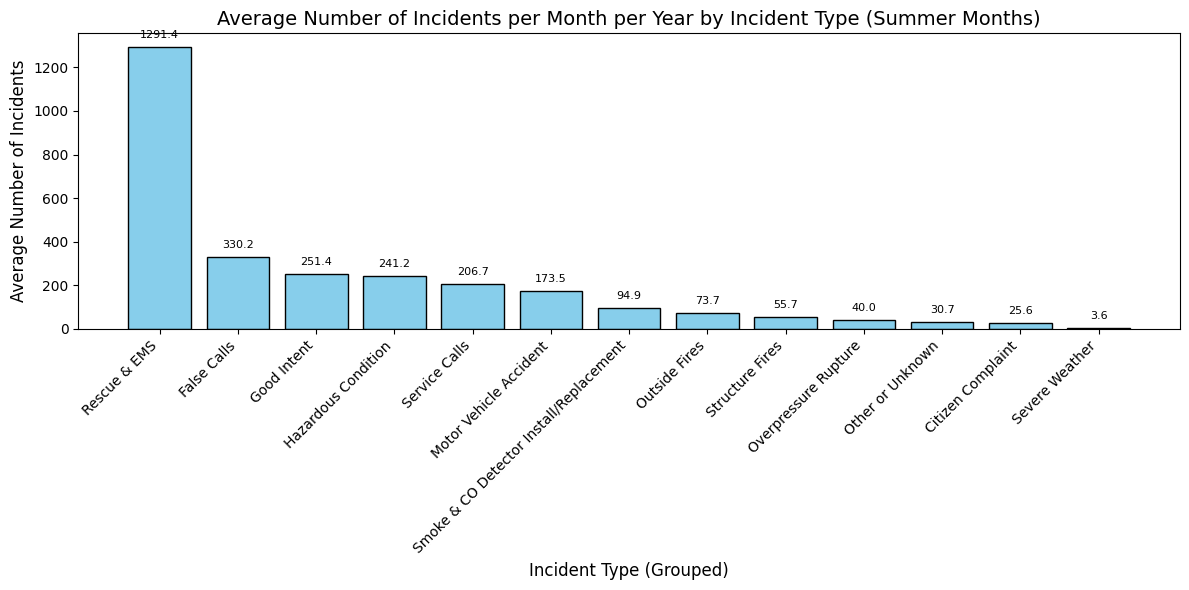

In [34]:
# Filter data for summer months (June, July, August)
summer_months = ['June', 'July', 'August']
summer_incidents = incident[incident['month_name'].isin(summer_months)]

# Group by 'year', 'month_name', and 'inctype_grouped_descr' and count incidents
grouped = summer_incidents.groupby(['year', 'month_name', 'inctype_grouped_descr']).size().reset_index(name='count')

# Calculate the average number of incidents per month per year for each 'inctype_grouped_descr'
avg_incidents_by_type = grouped.groupby('inctype_grouped_descr')['count'].mean().reset_index()
avg_incidents_by_type = avg_incidents_by_type.sort_values(by='count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_incidents_by_type['inctype_grouped_descr'], avg_incidents_by_type['count'], 
               color='skyblue', edgecolor='black')

# Annotate the bars with their values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset for visibility
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.title('Average Number of Incidents per Month per Year by Incident Type (Summer Months)', fontsize=14)
plt.xlabel('Incident Type (Grouped)', fontsize=12)
plt.ylabel('Average Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


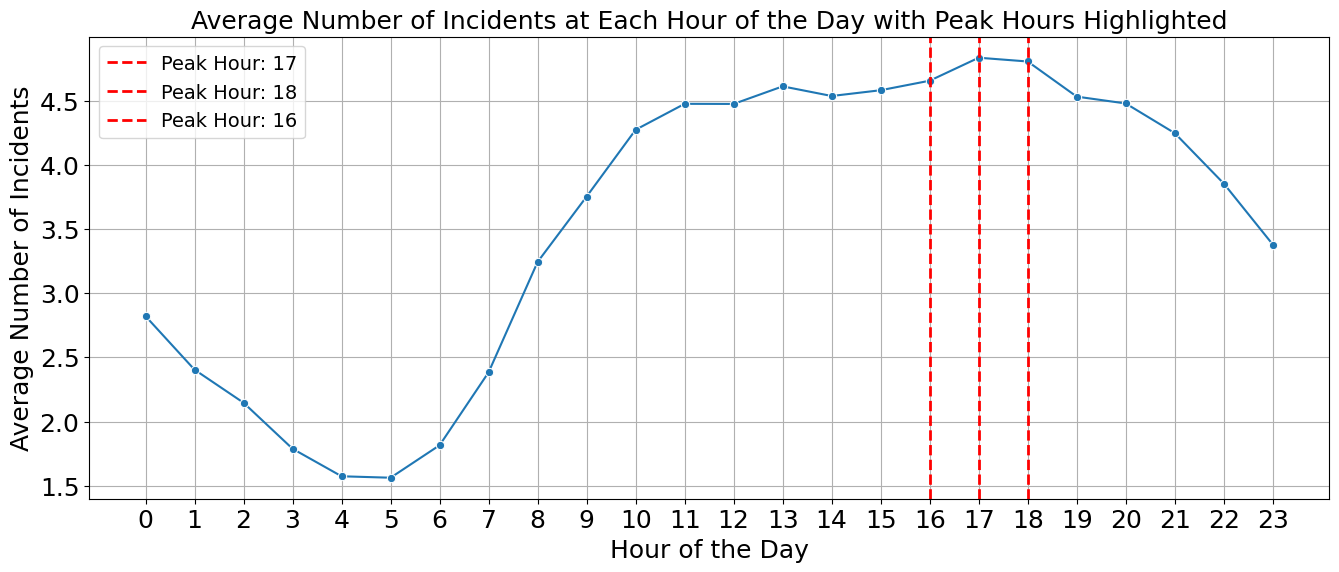

In [35]:
# Convert 'incident_date_time' to datetime format
incident['incident_date_time'] = pd.to_datetime(incident['incident_date_time'])

# Extract year, month, and hour from the 'incident_date_time'
incident['year'] = incident['incident_date_time'].dt.year
incident['month'] = incident['incident_date_time'].dt.month
incident['hour'] = incident['incident_date_time'].dt.hour

# Group by hour and count the number of incidents for each hour
incident_counts_per_hour = incident.groupby('hour').size().reset_index(name='incident_count')

# Calculate the total number of days in the dataset
total_days = len(incident['incident_date_time'].dt.date.unique())

# Calculate the average number of incidents per hour
incident_counts_per_hour['average_incidents_per_hour'] = incident_counts_per_hour['incident_count'] / total_days

# Identify the top 3 peak hours (the ones with the highest average incidents)
peak_hours = incident_counts_per_hour.nlargest(3, 'average_incidents_per_hour')['hour'].values

# Plotting the graph
plt.figure(figsize=(16, 6))
sns.lineplot(x=incident_counts_per_hour['hour'], y=incident_counts_per_hour['average_incidents_per_hour'], marker='o')

# Highlight the peak hours with vertical dashed lines
for hour in peak_hours:
    plt.axvline(x=hour, color='r', linestyle='--', linewidth=2, label=f'Peak Hour: {hour}')


# Adjust tick size and grid
plt.xticks(range(0, 24), fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)

# Add title and labels
plt.title('Average Number of Incidents at Each Hour of the Day with Peak Hours Highlighted', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=18)
plt.ylabel('Average Number of Incidents', fontsize=18)

# Add grid
plt.grid(True)

# Adjust legend size and position
plt.legend(fontsize=14, loc='upper left')

# Show the plot
plt.show()


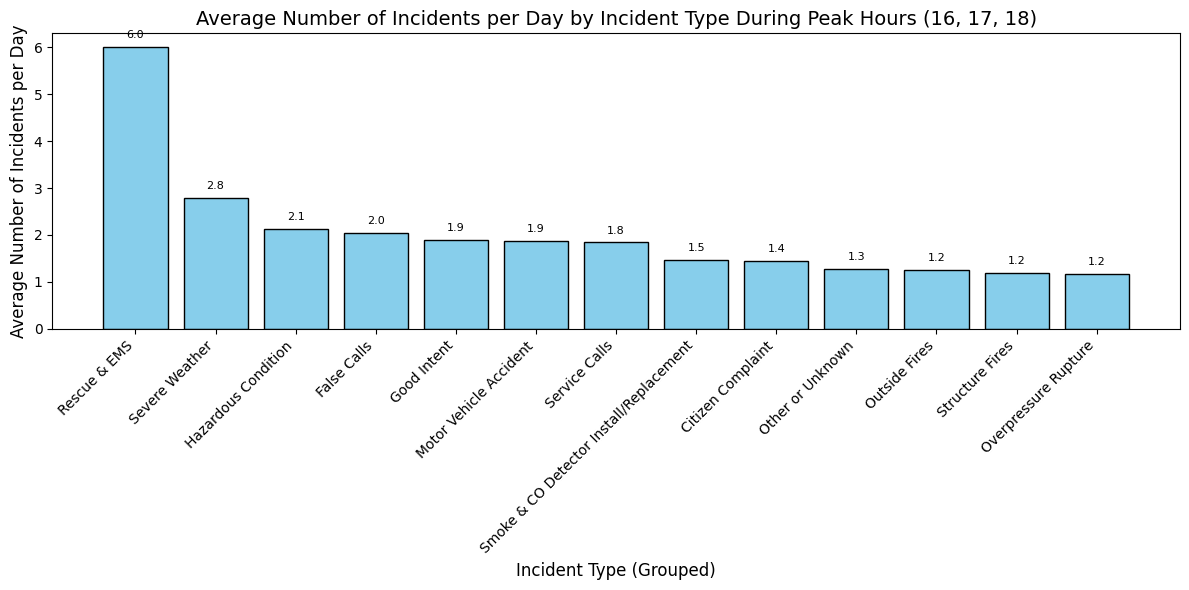

In [36]:
# Filter data for peak hours (16, 17, 18)
peak_hours = [16, 17, 18]
peak_incidents = incident[incident['hour'].isin(peak_hours)]

# Group by 'year', 'month_name', 'day', and 'inctype_grouped_descr' to count daily incidents
daily_incidents = (
    peak_incidents.groupby(['year', 'month', 'day', 'inctype_grouped_descr'])
    .size()
    .reset_index(name='count')
)

# Group by 'inctype_grouped_descr' to calculate the average number of incidents per day
avg_incidents_per_type = (
    daily_incidents.groupby('inctype_grouped_descr')['count']
    .mean()
    .reset_index()
    .sort_values(by='count', ascending=False)
)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_incidents_per_type['inctype_grouped_descr'], avg_incidents_per_type['count'], 
               color='skyblue', edgecolor='black')

# Annotate the bars with their values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset for visibility
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.title('Average Number of Incidents per Day by Incident Type During Peak Hours (16, 17, 18)', fontsize=14)
plt.xlabel('Incident Type (Grouped)', fontsize=12)
plt.ylabel('Average Number of Incidents per Day', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1500x800 with 0 Axes>

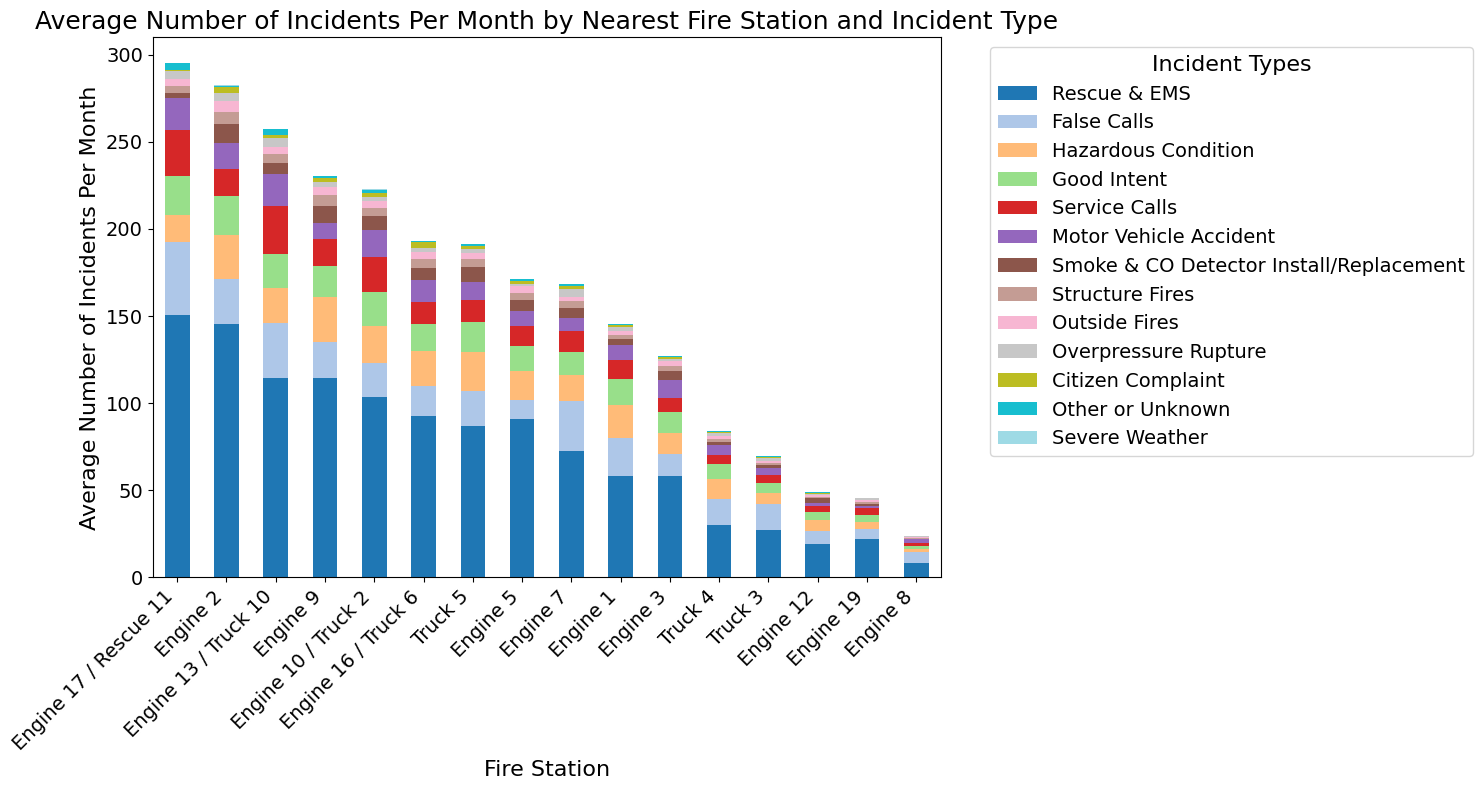

In [37]:
# Extract month name from 'incident_date_time' to group by
incident['month_name'] = pd.to_datetime(incident['incident_date_time']).dt.month_name()

# Group by fire station, month, and incident type to calculate the total number of incidents
monthly_incidents = (
    incident.groupby(['nearest_station_name', 'month_name', 'inctype_grouped_descr'])
    .size()
    .reset_index(name='total_incidents')
)

# Calculate the total number of months in the dataset (18 years * 12 months)
total_months = (2024 - 2006 + 1) * 12  # 18 years of data

# Calculate average number of incidents per month (divide by total number of months)
monthly_incidents['avg_incidents'] = monthly_incidents['total_incidents'] / total_months

# Calculate total incidents per fire station for sorting
monthly_incidents['total_station_incidents'] = monthly_incidents.groupby('nearest_station_name')['avg_incidents'].transform('sum')

# Sort fire stations by total incidents
monthly_incidents = monthly_incidents.sort_values(by='total_station_incidents', ascending=False)

# Calculate total incidents per incident type for sorting
inctype_order = (
    monthly_incidents.groupby('inctype_grouped_descr')['avg_incidents']
    .sum()
    .sort_values(ascending=False)
    .index
)

# Pivot the data for the stacked bar plot
pivot_data = monthly_incidents.pivot_table(
    index='nearest_station_name', 
    columns='inctype_grouped_descr', 
    values='avg_incidents', 
    aggfunc='sum', 
    fill_value=0
)

# Reorder the columns (incident types) based on total incidents
pivot_data = pivot_data[inctype_order]

# Reorder the index (fire stations) based on total incidents
pivot_data = pivot_data.loc[monthly_incidents['nearest_station_name'].unique()]

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))
pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    colormap='tab20'
)

# Customize the plot
plt.title('Average Number of Incidents Per Month by Nearest Fire Station and Incident Type', fontsize=18)
plt.xlabel('Fire Station', fontsize=16)
plt.ylabel('Average Number of Incidents Per Month', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Adjust the legend with a larger font size for both title and incident types
plt.legend(title='Incident Types', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=14,  # This sets the font size for incident types
           title_fontsize=16)  # This sets the font size for the legend title


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
